In [1]:


import pandas as pd
import numpy as np
import seaborn as sns

from itertools import combinations, permutations
from matplotlib import pyplot as plt
from scipy.stats import entropy
from scipy.special import kl_div
from utils import get_data_train



In [2]:
df = get_data_train()
n_bins = 5 # tu możemy wybrać różną liczbę kuełków go generowania histogramów
            # liczbę przedziałów na jakich będziemy liczyć dywergencję

In [3]:
activities = np.unique(df['activity'])
activities_dict = {activity: None for activity in activities}
activities_dict


{'LAYING': None,
 'SITTING': None,
 'STANDING': None,
 'WALKING': None,
 'WALKING_DOWNSTAIRS': None,
 'WALKING_UPSTAIRS': None}

In [4]:
for activity in activities_dict.keys():
    numerical_features = df[df['activity']==activity].drop(['activity', 'subject'], axis='columns')
    activities_dict[activity] = numerical_features.apply(
        lambda column: 
        np.histogram(column, bins=n_bins, density=True, range=(-1,1))[0])

In [5]:


combi_colnames = list(map('-'.join, list(permutations(activities,2))))
combi_df = pd.DataFrame(columns = combi_colnames)

numerical_features = df.drop(['activity', 'subject'], axis='columns').columns
for feature in numerical_features:
    combi_df = combi_df.append(pd.Series(np.repeat(feature, 30), name=feature, index=combi_colnames))



In [6]:
def replace_inf_and_sum(feature1, feature2, x):
    kl = kl_div(
        activities_dict[feature1][x],
        activities_dict[feature2][x])
    return sum(map(lambda x: 100 if x>100 else x, kl))

def count_inf(feature1, feature2, x):
    return sum(
        np.isinf(          # tu zliczamy infy
            kl_div(
                activities_dict[feature1][x],
                activities_dict[feature2][x])))

def take_median(feature1, feature2, x):
    return np.median(          
            kl_div(
                activities_dict[feature1][x],
                activities_dict[feature2][x]))

In [7]:
def apply_to_column(column):
    feature1, feature2 = column.name.split('-')
    return column.apply(lambda x: replace_inf_and_sum(feature1, feature2, x)) # w tej lambdzie można wybrać inną funkcję


result = combi_df.apply(apply_to_column)

In [8]:
chosen_best = result.apply(lambda x: max(x), axis=1).sort_values(ascending=False).head(20).index.to_list()
avg_best = result.apply(lambda x: sum(x), axis=1).sort_values(ascending=False).head(20).index.to_list()

In [ ]:
def plot_var(varname):
    sns.displot(df, x=varname, hue='activity', kind='kde')#bins=n_bins, multiple='dodge')
    plt.show()

In [ ]:
for varname in chosen_best: # lub alternatywnie chosen_best
    plot_var(varname)

In [ ]:
chosen_best

In [12]:
best_with_categorical = chosen_best + ['activity', 'subject']

In [13]:
df_chosen = pd.DataFrame( df[ best_with_categorical])

In [14]:
df_chosen

,fBodyAcc-mean()-X,tBodyAcc-mad()-X,fBodyAcc-std()-X,tGravityAcc-mean()-X,fBodyGyro-sma(),tBodyAcc-max()-X,tBodyAcc-std()-X,fBodyAcc-mad()-X,fBodyAccJerk-mean()-Y,tBodyAccJerk-mad()-Y,...,tGravityAccMag-entropy(),fBodyAcc-max()-X,tGravityAcc-max()-X,fBodyBodyAccJerkMag-mad(),tBodyAccJerk-std()-Y,fBodyAccMag-iqr(),fBodyAccJerk-mad()-Y,tBodyAccJerk-iqr()-X,activity,subject
0,-0.994783,-0.995112,-0.995422,0.963396,-0.985276,-0.934724,-0.995279,-0.996889,-0.987170,-0.986207,...,-0.232582,-0.993756,0.892055,-0.991976,-0.988360,-0.973273,-0.990519,-0.994364,STANDING,1
1,-0.997451,-0.998807,-0.998680,0.966561,-0.986869,-0.943068,-0.998245,-0.997890,-0.981311,-0.978938,...,-0.441876,-0.999372,0.892060,-0.989732,-0.981064,-0.984479,-0.982929,-0.993863,STANDING,1
2,-0.993594,-0.996520,-0.996313,0.966878,-0.986009,-0.938692,-0.995380,-0.994097,-0.981642,-0.979300,...,-0.599939,-0.998158,0.892401,-0.987274,-0.980956,-0.989237,-0.981091,-0.987846,STANDING,1
3,-0.995491,-0.997099,-0.996312,0.967615,-0.990344,-0.938692,-0.996091,-0.994547,-0.988727,-0.985717,...,-0.589006,-0.997404,0.893817,-0.989055,-0.987553,-0.983215,-0.987145,-0.994678,STANDING,1
4,-0.997286,-0.998321,-0.998606,0.968224,-0.988706,-0.942469,-0.998139,-0.997725,-0.988790,-0.986537,...,-0.704599,-0.999277,0.893817,-0.993305,-0.988359,-0.997343,-0.988867,-0.995888,STANDING,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,-0.131366,-0.282301,-0.221989,0.923148,-0.223417,0.210795,-0.195387,-0.050748,-0.340391,-0.325092,...,0.814509,-0.318185,0.867718,-0.221443,-0.356428,-0.101796,-0.369551,-0.439171,WALKING_UPSTAIRS,30
7348,-0.159077,-0.322552,-0.267430,0.918343,-0.298720,0.117440,-0.235309,-0.177661,-0.347117,-0.353584,...,0.836935,-0.332146,0.866116,-0.258246,-0.386212,-0.363379,-0.452306,-0.381927,WALKING_UPSTAIRS,30
7349,-0.345767,-0.304515,-0.173212,0.919810,-0.320389,0.043999,-0.218218,-0.249486,-0.367945,-0.361106,...,0.844283,-0.160368,0.854641,-0.347359,-0.378177,-0.444155,-0.425311,-0.286234,WALKING_UPSTAIRS,30
7350,-0.400368,-0.310487,-0.158192,0.922323,-0.411943,0.101702,-0.219139,-0.247028,-0.458305,-0.395983,...,0.779385,-0.147421,0.855988,-0.336879,-0.406063,-0.533311,-0.437944,-0.364377,WALKING_UPSTAIRS,30


In [15]:
df_chosen_sep_by_act = []
for i in range(6):
    df_chosen_sep_by_act.append([])

for i in range(6):
    df_chosen_sep_by_act[i] = df_chosen[ df_chosen['activity'] == activities[i]].copy()
    df_chosen_sep_by_act[i].drop( columns=['activity', 'subject'], inplace = True)

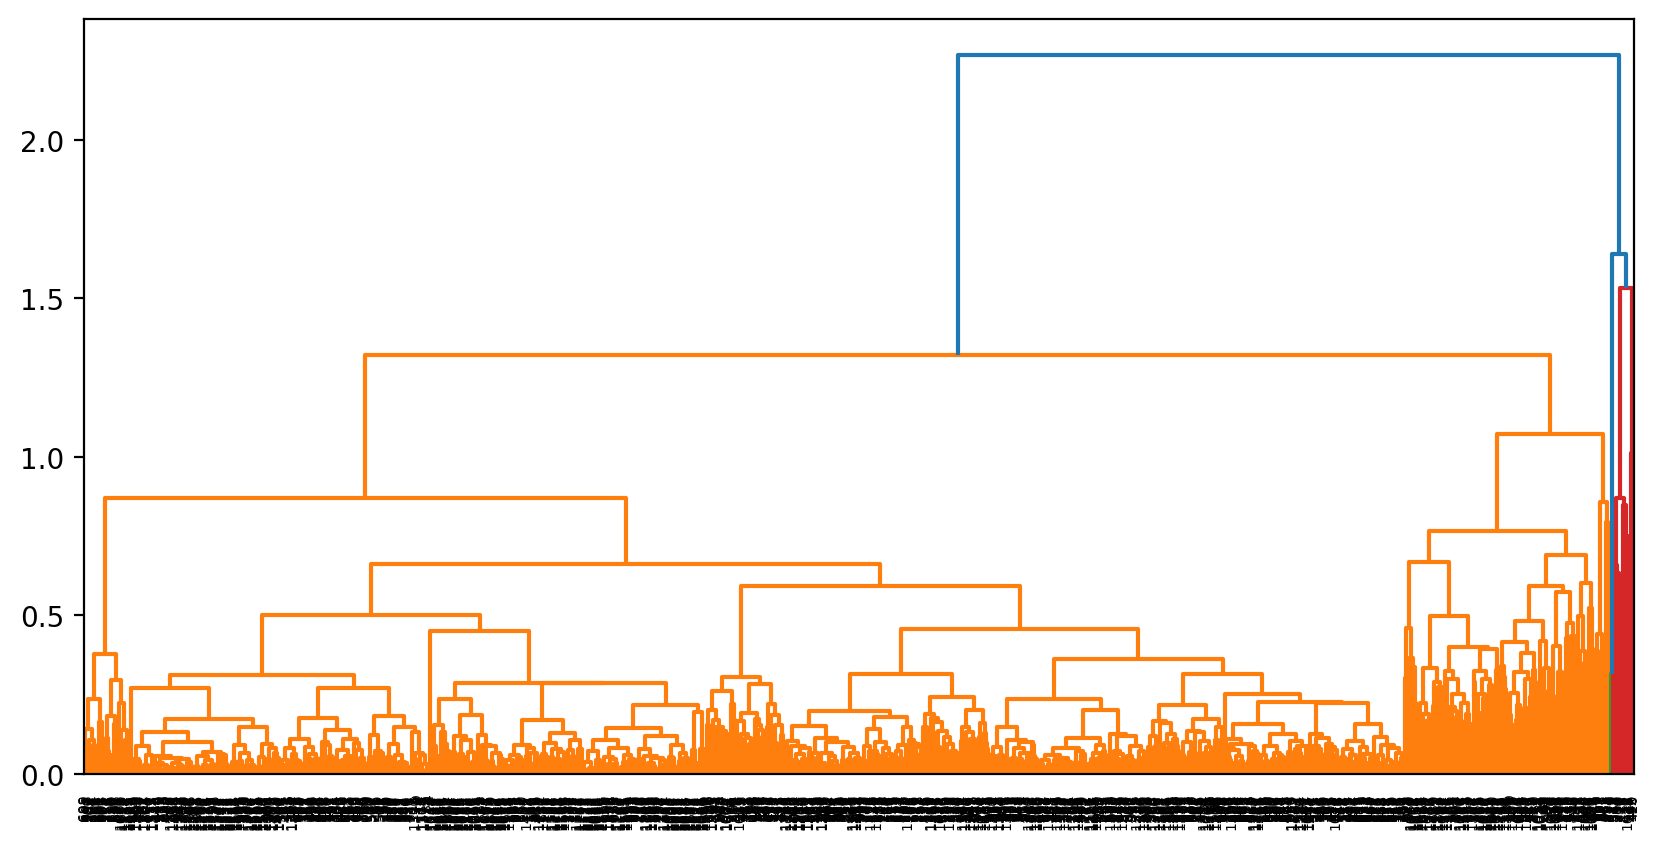

In [16]:
from scipy.cluster import hierarchy

# Generujemy nowe dane o mnjejszej liczbie punktów (dla czytelności)
Z = hierarchy.linkage( df_chosen_sep_by_act[0], method='average')
plt.figure(figsize=(10, 5), dpi= 200, facecolor='w', edgecolor='k')
hierarchy.dendrogram(Z)
plt.show()

In [17]:
# A w praktyce wygląda to tak:
def count_clustering_scores(X, cluster_num, model, score_fun):
    # Napiszmy tę funkcje tak ogólnie, jak to możliwe. 
    # Zwróćcie uwagę na przekazanie obiektów typu callable: model i score_fun.
    if isinstance(cluster_num, int):
        cluster_num_iter = [cluster_num]
    else:
        cluster_num_iter = cluster_num
        
    scores = []    
    for k in cluster_num_iter:
        model_instance = model(n_clusters=k)
        labels = model_instance.fit_predict(X)
        wcss = score_fun(X, labels)
        scores.append(wcss)
    
    if isinstance(cluster_num, int):
        return scores[0]
    else:
        return scores

In [ ]:
df_chosen_sep_by_act[1]

In [18]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouette_vec = []
plots = []
for i in range(6):
    # In each iteration, add an empty list to the main list
    silhouette_vec.append([])
    plots.append([])

cluster_num_seq = list( range(2, 11)) # Niektóre metryki nie działają gdy mamy tylko jeden klaster

for i in range(6):
    
    silhouette_vec[i] = count_clustering_scores(
        df_chosen_sep_by_act[i], cluster_num_seq, KMeans, silhouette_score)

In [ ]:
frames = []
for i in range(6):
    # In each iteration, add an empty list to the main list
    frames.append([])

for i in range(6):
    frames[i] = pd.DataFrame(
        np.array(
            [silhouette_vec[i], list( cluster_num_seq)]).transpose(),
        columns = ["silhouette", "no of clusters"])
    frames[i]["acitivity"] = activities[i]

In [ ]:
stacked = pd.concat( frames, ignore_index=True)

In [ ]:
import seaborn as sns
sns.set(rc={"figure.figsize":(12, 8)})
sns.lineplot(data= stacked, 
             x="no of clusters", y="silhouette", hue="acitivity")



In [ ]:
subjects = np.unique( df["subject"])
n_subjects = len( subjects)
df_by_subject = []
clusters = []

df_by_subject_by_cluster = []

for i in range( n_subjects):
    # In each iteration, add an empty list to the main list
    df_by_subject.append([])
    clusters.append([])
    df_by_subject_by_cluster.append([])
    
    for j in range( 6):
        df_by_subject_by_cluster[i].append([])

for i in range( n_subjects):
    df_by_subject[i] = df[df["subject"] == subjects[i]].copy()
    df_by_subject[i].drop( columns=['activity', 'subject'], inplace = True)
    
    clusters[i] = KMeans(n_clusters=6, random_state=1618).fit( df_by_subject[i])
    df_by_subject[i]["cluster"] = clusters[i].labels_
    
    for j in range( 6):
        df_by_subject_by_cluster[i][j] = df_by_subject[i][ df_by_subject[i]["cluster"] == j ].copy()
        df_by_subject_by_cluster[i][j].drop( columns = ["cluster"], inplace = True)
        df_by_subject_by_cluster[i][j] = df_by_subject_by_cluster[i][j].to_numpy()

In [ ]:
clusters[0].cluster_centers_

In [ ]:
from scipy.spatial import distance
import statistics

distances = []

for i in range( n_subjects):
    # In each iteration, add an empty list to the main list
    distances.append([])

    for j in range( n_subjects):
        distances[i].append([])


for i in range( n_subjects):
    for j in range( n_subjects):
        
        dists_to_clusters = []
        for k in range(6):
            dists_to_clusters.append([])
            
            dist_from_single = []
            for l in range(6):
                dist_from_single.append([])
                dist_from_single[l] = distance.euclidean(
                    clusters[i].cluster_centers_[k], clusters[j].cluster_centers_[l]
                )
            dists_to_clusters[k] = min( dist_from_single)
        distances[i][j] =  statistics.mean( dists_to_clusters)

In [ ]:
from scipy.spatial import distance
import statistics

distances2 = []

for i in range( n_subjects):
    # In each iteration, add an empty list to the main list
    distances2.append([])

    for j in range( n_subjects):
        distances2[i].append([])


for i in range( n_subjects):
    for j in range( n_subjects):
        
        dists_to_clusters = []
        for k in range(6):
            dists_to_clusters.append([])
            
            dist_from_single = []
            for l in range(6):
                dist_from_single.append([])
                dist_from_single[l] = distance.euclidean(
                    clusters[i].cluster_centers_[k], clusters[j].cluster_centers_[l]
                )
            dists_to_clusters[k] = min( dist_from_single)
        distances2[i][j] =  max( dists_to_clusters)

In [ ]:
sns.heatmap( distances)

In [ ]:
sns.heatmap( distances2)

## KMeans

In [ ]:
from sklearn.metrics import silhouette_score

cluster_num_seq = [x for x in range(2, 11)]
silhouette_vec = count_clustering_scores(df.drop(columns=['subject', 'activity']), cluster_num_seq, KMeans, silhouette_score)
plt.plot(cluster_num_seq, silhouette_vec, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.title('Clustering on a full data set')
plt.show()

In [ ]:
silhouette_vec_chosen = count_clustering_scores(df[chosen_best], cluster_num_seq, KMeans, silhouette_score)
plt.plot(cluster_num_seq, silhouette_vec, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.title('Clustering on chosen best columns')
plt.show()

In [ ]:
silhouette_vec_avg_best = count_clustering_scores(df[avg_best], cluster_num_seq, KMeans, silhouette_score)
plt.plot(cluster_num_seq, silhouette_vec, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.title('Clustering on avarage best columns')
plt.show()

In [ ]:
tmp = pd.DataFrame(
    {'Full dataset': silhouette_vec, 
     '20 best chosen columns': silhouette_vec_chosen, 
     '20 best in average columns': silhouette_vec_avg_best})
display(tmp)
tmp = pd.concat([tmp,pd.Series(cluster_num_seq, name='k')], axis=1, join='inner', ignore_index=True)
tmp.columns = ['Full dataset', '20 best chosen columns', '20 best in average columns', 'k']
tmp.plot(x='k', style=['r-.', 'b-', 'g--'], title='K-Means clustering', ylabel='Silhuette score')

In [19]:
def get_inertia_scores(X, cluster_num_seq, clusterer):
    scores=[]
    for n_cluster in cluster_num_seq:
        model_instance = clusterer(n_clusters=n_cluster)
        model_instance.fit(X)
        scores.append(model_instance.inertia_)
    return scores

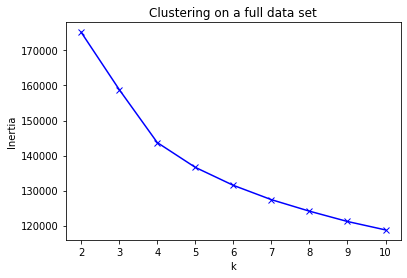

In [22]:
cluster_num_seq = [x for x in range(2, 11)]
scores_full = get_inertia_scores(df.drop(columns=['subject', 'activity']), cluster_num_seq, KMeans)
plt.plot(cluster_num_seq, scores_full, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Clustering on a full data set')
plt.show()

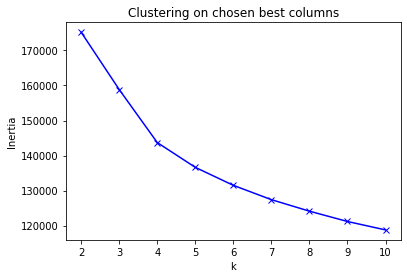

In [23]:
cluster_num_seq = [x for x in range(2, 11)]
scores_chosen = get_inertia_scores(df[chosen_best], cluster_num_seq, KMeans)
plt.plot(cluster_num_seq, scores_full, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Clustering on chosen best columns')
plt.show()

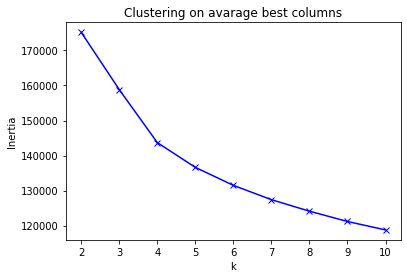

In [24]:
cluster_num_seq = [x for x in range(2, 11)]
scores_avg = get_inertia_scores(df[avg_best], cluster_num_seq, KMeans)
plt.plot(cluster_num_seq, scores_full, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Clustering on avarage best columns')
plt.show()

,Full dataset,20 best chosen columns,20 best in average columns
0,175201.891859,7851.775139,4768.432403
1,158841.783044,4893.879624,3558.995696
2,143709.965285,3217.991001,2608.554888
3,136628.169001,2720.077149,2339.721759
4,131492.173648,2312.039871,2081.340358
5,127404.468344,2028.828170,1873.815062
6,124120.138449,1818.851641,1760.935763
7,121173.565161,1681.806632,1654.298386
8,118769.021016,1559.461456,1577.587193


<AxesSubplot:title={'center':'K-Means clustering'}, xlabel='k', ylabel='Inertia'>

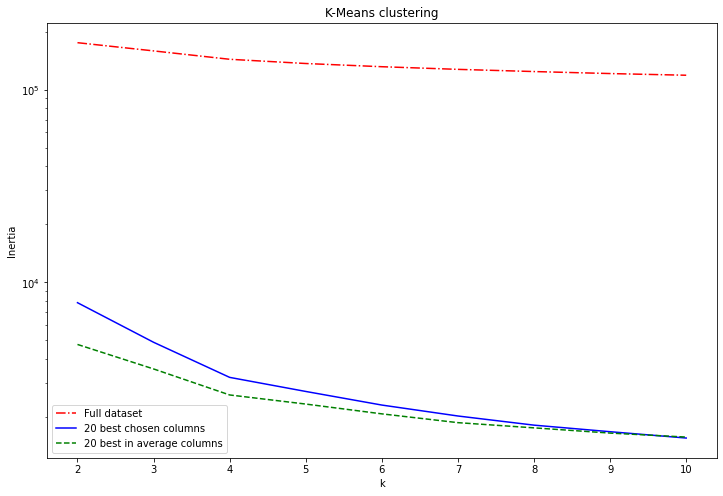

In [27]:
tmp = pd.DataFrame(
    {'Full dataset': scores_full, 
     '20 best chosen columns': scores_chosen, 
     '20 best in average columns': scores_avg})
display(tmp)
tmp = pd.concat([tmp,pd.Series(cluster_num_seq, name='k')], axis=1, join='inner', ignore_index=True)
tmp.columns = ['Full dataset', '20 best chosen columns', '20 best in average columns', 'k']
tmp.plot(x='k', style=['r-.', 'b-', 'g--'], title='K-Means clustering', ylabel='Inertia', logy=True, figsize=(12,8))

In [ ]:
!pip install yellowbrick

In [ ]:
from yellowbrick.cluster import (
    SilhouetteVisualizer,
    KElbowVisualizer)

In [ ]:
km = KMeans(random_state=123)
visualizer = KElbowVisualizer(km, k=(2,10))
visualizer.fit(df.drop(columns=['subject', 'activity']))
visualizer.show()

In [ ]:
visualizer = KElbowVisualizer(km, k=(2,10))
visualizer.fit(df[avg_best])
visualizer.show()

In [ ]:
visualizer = KElbowVisualizer(km, k=(2,10))
visualizer.fit(df[chosen_best])
visualizer.show()

In [ ]:
all_cols_clusterer = KMeans(random_state=123, n_clusters=4)
all_cols_clusterer.fit(df.drop(columns=['subject', 'activity']))
visualizer = silhouette_visualizer(all_cols_clusterer,
                                    X=df.drop(columns=['subject', 'activity']), 
                                    colors='yellowbrick',
                                    is_fitted=True)
visualizer.show()

In [ ]:
fig, ax = plt.subplots(3, 1, figsize=(15,12), sharex=True)

km = KMeans(n_clusters=4, max_iter=100, random_state=42)
visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[0])
visualizer.fit(df.drop(columns=['subject', 'activity']))
visualizer.finalize()
ax[0].set_title('Full dataset')



km = KMeans(n_clusters=4, max_iter=100, random_state=42)
visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[1])
visualizer.fit(df[chosen_best])
visualizer.finalize()
ax[1].set_title('20 best chosen columns')



km = KMeans(n_clusters=4, max_iter=100, random_state=42)
visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[2])
visualizer.fit(df[avg_best])
visualizer.finalize()
ax[2].set_title('20 best in average columns')


## Agglomerative Clustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster_num_seq = [x for x in range(2, 11)]
silhouette_vec = count_clustering_scores(df.drop(columns=['subject', 'activity']),
                                         cluster_num_seq, AgglomerativeClustering, 
                                         silhouette_score)

plt.plot(cluster_num_seq, silhouette_vec, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.title('Agglomerative Clustering on full dataset')
plt.show()

In [ ]:
silhouette_vec_best = count_clustering_scores(df[avg_best],
                                         cluster_num_seq, AgglomerativeClustering, 
                                         silhouette_score)

plt.plot(cluster_num_seq, silhouette_vec_best, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.title('Agglomerative Clustering on full dataset')
plt.show()

In [ ]:
fig, ax = plt.subplots(5, 2, figsize=(25,24), sharex=True)
for i in range(2,12):
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)

    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(df[chosen_best])